# Maaiveldhoogteverdeling en boezempeilen Dwarsdiep

Uit gemeten waterstanden op het Dwarsdiep is berekend hoe vaak bepaalde waterstanden zijn voorgekomen in de periode 2012-2021. Dit notebook brengt in beeld hoeveel hectare waardevolle graslanden inunderen bij de berekende frequenties van waterstanden. De gebruikte maaiveldshoogten zijn afkomstig uit het AHN3.

Auteur: Thomas de Meij (Staatsbosbeheer)  
Datum : 14 juni 2021  

### Inlezen csv bestand met maaiveldshoogten AHN

In [24]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style("whitegrid")

sourcedir = r'..\01_source\ahn3\\'
##datadir = r'..\\02_data\\frequentieanalyse wemerpolder\\'
figdir = r'..\03_result\maaiveldsanalyse\\'

In [25]:
# read surface levels at points from csv
missing = -3.40282e+38
fpath = f'{sourcedir}ahn3_punten.csv'
sf = pd.read_csv(fpath,names=['xcr','ycr','nap'],na_values='-3.40282e+38')
sf = sf.dropna().reset_index(drop=True)
sf

,xcr,ycr,nap
0,216787.5,577762.5,-0.134866
1,216792.5,577762.5,-0.129339
2,216767.5,577757.5,-0.967678
3,216772.5,577757.5,-0.994768
4,216777.5,577757.5,-0.583706
...,...,...,...
43769,216272.5,575887.5,-0.155299
43770,216277.5,575887.5,-0.099802
43771,216262.5,575882.5,-0.172997
43772,216267.5,575882.5,-0.148911


Het bestand met maaiveldshoogten bevat 43.774 punten met een maaivelshoogte en coordinaten.

## Controle: kaart met maaiveldhoogte ingelezen punten

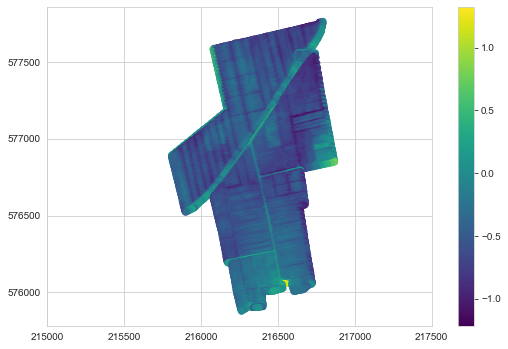

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8,5) # w,h
fig.tight_layout()

# plot map of points with surfacelevel
x = sf['xcr']
y = sf['ycr']
colors = sf['nap']
pathcollection = ax.scatter(x, y, c=colors, cmap='viridis')
fig.colorbar(pathcollection) 

# lot of code to get axes equal
ax.set_aspect('equal', 'box')
ax.set_xlim(215000,217500)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))

fpath = f'{figdir}maaiveldshoogte waardevolle percelen.jpg'
fig.savefig(fpath,dpi=300,bbox_inches='tight')

## Cumlatieve frequentieverdeling maaiveldshoogten

De maaiveldshoogten moeten worden gerelateerd aan de frequentieverdeling van waterstanden en het aantal ginundeerde hectares. We voeren twee stappen uit:
- Sorteren van de maaiveldshoogten van laag naar hoog
- berekenen van het aantal ha beneden een gegeven maaiveldshoogte

In [27]:
sfcum = sf.dropna().sort_values('nap').reset_index(drop=True)
sfcum['ha'] = [((x+1)*5**2/10000) for x in sfcum.index.values]
sfcum

,xcr,ycr,nap,ha
0,216767.5,577747.5,-1.216250,0.0025
1,216567.5,577692.5,-1.212150,0.0050
2,216147.5,577337.5,-1.194900,0.0075
3,216567.5,577687.5,-1.193100,0.0100
4,216747.5,577742.5,-1.180620,0.0125
...,...,...,...,...
43769,216867.5,576852.5,0.710823,109.4250
43770,216867.5,576847.5,0.768012,109.4275
43771,216552.5,576057.5,1.150720,109.4300
43772,216542.5,576057.5,1.156720,109.4325


## Tabel met maatgevende waterstanden  

Uit een analyse van gemeten waterstanden op de boezem zijn maatgevende waterpeilen afgeleid waarvoor beoordeling van inundaties zinvol is. We maken een nette tabel van maatgevende waterpeilen en hectares beneden dat peil.

In [28]:
points = [(-0.93,'streefpeil electraboezem'),
          (-0.85,'gemiddeld peil Dwarsdiep'),
          (-0.80,'10-daagse zomerstand'),
          (-0.70,'hoogste peil zomer 2018'),
          (-0.75,'10-daagse winterstand'),
          (-0.60,'hoogst gemeten zomerstand'),
          (-0.39,'hoogst gemeten winterstand')]
mp = pd.DataFrame(points,columns=['peil','situatie'])
mp

,peil,situatie
0,-0.93,streefpeil electraboezem
1,-0.85,gemiddeld peil Dwarsdiep
2,-0.80,10-daagse zomerstand
3,-0.70,hoogste peil zomer 2018
4,-0.75,10-daagse winterstand
5,-0.60,hoogst gemeten zomerstand
6,-0.39,hoogst gemeten winterstand


In [29]:
for rownr,row in mp.iterrows():
    
    idx = sfcum[sfcum['nap'].ge(row['peil'])].index[0]
    mp.loc[rownr,'ha'] = sfcum.loc[idx,'ha']
    mp.loc[rownr,'nap'] = sfcum.loc[idx,'nap']

fpath = f'{figdir}maatgevende boezempeilen.xlsx'
mp.to_excel(fpath,index=False)
mp

,peil,situatie,ha,nap
0,-0.93,streefpeil electraboezem,1.5500,-0.929312
1,-0.85,gemiddeld peil Dwarsdiep,4.0025,-0.849984
2,-0.80,10-daagse zomerstand,6.7800,-0.799985
3,-0.70,hoogste peil zomer 2018,18.2025,-0.699988
4,-0.75,10-daagse winterstand,11.3650,-0.749986
5,-0.60,hoogst gemeten zomerstand,37.9175,-0.599996
6,-0.39,hoogst gemeten winterstand,80.7875,-0.389996


## Grafiek met aantal hectare inundatie  

Tenslotte maken we een grafiek met het aantal hectare waardevolle graslanden dat inundeert bij maatgevende waterpeilen:

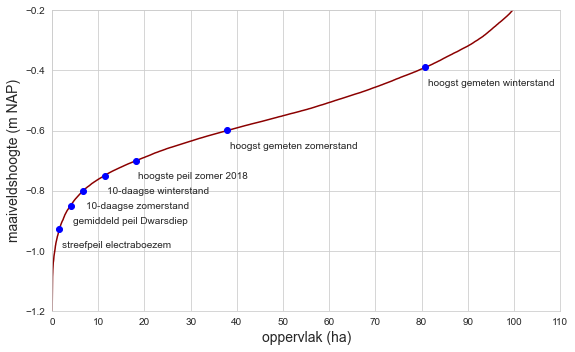

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8,5) # w,h
fig.tight_layout(pad=2.0)

ax.plot(sfcum['ha'],sfcum['nap'],color='#8b0000')

ax.set_xlim(0,110)
ax.set_ylim(-1.2,0.2)
ax.set_xlabel('oppervlak (ha)',fontsize=14)
ax.set_ylabel('maaiveldshoogte (m NAP)',fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

for rownr,row in mp.iterrows():
    ha = row['ha']
    nap = row['nap']
    lbl = row['situatie']

    ax.plot([ha], [nap], marker='o', markersize=6, color="blue")
    ax.text(ha+0.5,nap-0.06,lbl)
    ax.set_ylim(-1.2,-0.2)

fpath = f'{figdir}inundaties bij maatgevende boezempeilen.jpg'
fig.savefig(fpath,dpi=300,bbox_inches='tight')
